In [1]:
# import basic libraries
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\willn\\SynergisticIT\\Data Science\\Simple_Linear_Regr_Practice'

In [3]:
calorie_df = pd.read_csv('calories_consumed.csv')
calorie_df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
calorie_df = calorie_df.iloc[:, [1,0]]
calorie_df.rename(columns={"Calories Consumed": "Calories_Consumed", 'Weight gained (grams)': 'WeightGrams_Gained'}, inplace=True)
calorie_df

,Calories_Consumed,WeightGrams_Gained
0,1500,108
1,2300,200
2,3400,900
3,2200,200
4,2500,300
5,1600,110
6,1400,128
7,1900,62
8,2800,600
9,3900,1100


In [5]:
calorie_df.shape

(14, 2)

# EDA:
- Measures of Central Tendency
- Measures of Dispersion
- Third moment business decision
- Fourth moment business decision
- Probability of distribution variables
- Graphical representations (Histogram, Box Plot, Dot-Plot, Stem & Leaf, Bar Plot, etc...

<BarContainer object of 14 artists>

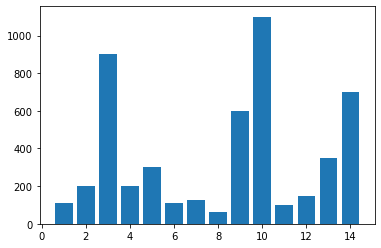

In [6]:
# Graphical representation
import matplotlib.pyplot as plt

plt.bar(height = calorie_df['WeightGrams_Gained'], x = np.arange(1, 15, 1 ))

<BarContainer object of 14 artists>

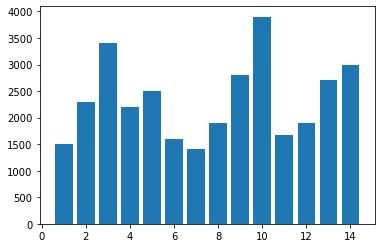

In [7]:
plt.bar(height = calorie_df['Calories_Consumed'], x=np.arange(1, 15, 1))

In [8]:
skew_value_gains = calorie_df['WeightGrams_Gained'].skew()
kurt_value_gains = calorie_df['WeightGrams_Gained'].kurt()
print('The skewness of the WeightGrams_Gained column is ----> ', skew_value_gains)
print('The skewness of the Calories_Consumed column is ----> ', kurt_value_gains)

The skewness of the WeightGrams_Gained column is ---->  1.2557366483972048
The skewness of the Calories_Consumed column is ---->  0.4312724433726336


In [9]:
skew_value_consumed = calorie_df['Calories_Consumed'].skew()
kurt_value_consumed = calorie_df['Calories_Consumed'].kurt()
print('The skewness of the Calories_Consumed column is ----> ', skew_value_consumed)
print('The skewness of the Calories_Consumed column is ----> ', kurt_value_consumed)

The skewness of the Calories_Consumed column is ---->  0.6549299573588712
The skewness of the Calories_Consumed column is ---->  -0.29048129735135975


{'whiskers': [<matplotlib.lines.Line2D at 0x1d4e06218b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4e0621f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4e06215e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4e0637430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4e0637700>],
 'means': []}

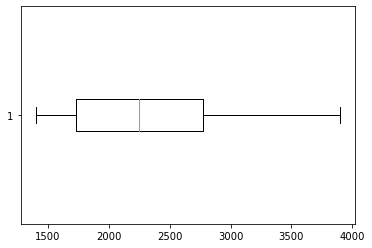

In [10]:
plt.boxplot(calorie_df['Calories_Consumed'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4e068abe0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d4e069b1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d4e068a910>],
 'medians': [<matplotlib.lines.Line2D at 0x1d4e069b760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d4e069ba30>],
 'means': []}

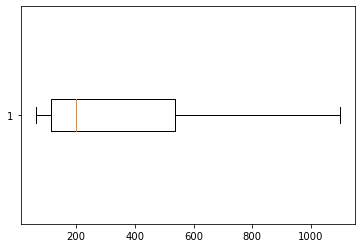

In [11]:
plt.boxplot(calorie_df['WeightGrams_Gained'], vert = False)

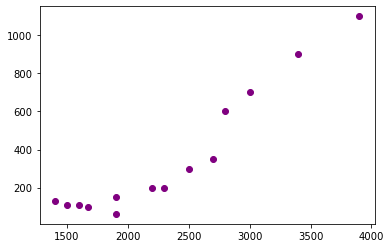

In [12]:
plt.scatter(x=calorie_df['Calories_Consumed'], y = calorie_df['WeightGrams_Gained'], color='purple')

In [13]:
np.corrcoef(calorie_df['Calories_Consumed'], calorie_df['WeightGrams_Gained'])

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

## Covariance
- A measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds true for the lesser values, the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the fewer values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of covariance, therefore, shows the tendency in the linear relationship between the variables. The magnitude of covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. **The normalized version of covariance ---> the correlation coefficient, however, shows by its magnitude the strength of the linear relationship.**

In [14]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov()
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables

cov_output = np.cov(calorie_df['Calories_Consumed'], calorie_df['WeightGrams_Gained'])[0,1] ##<---Whats this?
cov_output

237669.4505494506

In [15]:
# import stats package(s)
import statsmodels.formula.api as smf

# Simple Linear Regression (SLR)
model = smf.ols('WeightGrams_Gained ~ Calories_Consumed', data=calorie_df).fit()
model.summary()

C:\Users\willn\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     WeightGrams_Gained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.86e-07
Time:                        17:25:49   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories_Consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
calorie_df

,Calories_Consumed,WeightGrams_Gained
0,1500,108
1,2300,200
2,3400,900
3,2200,200
4,2500,300
5,1600,110
6,1400,128
7,1900,62
8,2800,600
9,3900,1100


In [18]:
pred1 = model.predict(calorie_df['Calories_Consumed'])

In [19]:
calorie_df['WeightGain_Pred'] = pred1

In [20]:
calorie_df

,Calories_Consumed,WeightGrams_Gained,WeightGain_Pred
0,1500,108,4.482599
1,2300,200,340.607908
2,3400,900,802.780209
3,2200,200,298.592245
4,2500,300,424.639236
5,1600,110,46.498263
6,1400,128,-37.533065
7,1900,62,172.545254
8,2800,600,550.686227
9,3900,1100,1012.858527


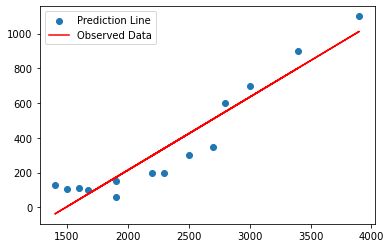

In [21]:
# Regression Line
plt.scatter(calorie_df.Calories_Consumed, calorie_df.WeightGrams_Gained)
plt.plot(calorie_df.Calories_Consumed, pred1, 'r')
plt.legend(['Prediction Line', 'Observed Data'])
plt.show()

In [23]:
error = calorie_df.WeightGrams_Gained - calorie_df.WeightGain_Pred
error

0     103.517401
1    -140.607908
2      97.219791
3     -98.592245
4    -124.639236
5      63.501737
6     165.533065
7    -110.545254
8      49.313773
9      87.141473
10     24.090773
11    -22.545254
12   -158.670563
13     65.282446
dtype: float64

In [24]:
squared_error = error**2
squared_error

0     10715.852285
1     19770.583896
2      9451.687843
3      9720.430718
4     15534.939071
5      4032.470630
6     27401.195454
7     12220.253126
8      2431.848242
9      7593.636341
10      580.365328
11      508.288466
12    25176.347560
13     4261.797761
dtype: float64

In [25]:
mean_square_error1 = np.mean(squared_error)
mean_square_error1

10671.406908565588

In [26]:
root_mean_squared_error = np.sqrt(mean_square_error1)
root_mean_squared_error

103.30250194726935

In [27]:
## This value is over 100, so how can I subtract it from 100 and get a viable number; I do not believe that -3.3 can be an
## error value that means anything. 

In [29]:
#### Model Building on Transformed Data
model2= smf.ols('WeightGrams_Gained ~ np.log(Calories_Consumed)', data=calorie_df).fit()
model2.summary()

C:\Users\willn\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     WeightGrams_Gained   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.25e-05
Time:                        17:34:33   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Calories_Consumed)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred2 = model2.predict(pd.DataFrame(calorie_df['Calories_Consumed']))

In [31]:
calorie_df['WeightGain_Pred2'] = pred2
calorie_df

,Calories_Consumed,WeightGrams_Gained,WeightGain_Pred,WeightGain_Pred2
0,1500,108,4.482599,-19.998702
1,2300,200,340.607908,385.377115
2,3400,900,802.780209,756.063670
3,2200,200,298.592245,343.220320
4,2500,300,424.639236,464.453875
5,1600,110,46.498263,41.207806
6,1400,128,-37.533065,-85.429591
7,1900,62,172.545254,204.185731
8,2800,600,550.686227,571.931596
9,3900,1100,1012.858527,886.181334
